# Assignment: Advanced Regression

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:
Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

### Bussiness Goel
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

##### Note: Install category enconder in case of not exist on system

Used for binary encoding with high cardinality values.

In [1]:
# install it 
# pip install category_encoders

In [2]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

## Data Understanding and Prepration

In [3]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [5]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [6]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [9]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [14]:
#Drop Alley column because more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])

In [15]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [16]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [17]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [18]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [19]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [20]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [21]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [22]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [23]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [24]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [25]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [26]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [27]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [28]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [29]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [30]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [31]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [32]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [33]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [34]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [35]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [36]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [37]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [38]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [40]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [41]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [42]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [45]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [46]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [47]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [48]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [49]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [50]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [51]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [53]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [55]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [57]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [58]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')

#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

# Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [59]:
# data_encoded=encoder.fit_transform(house_data) 
# data_encoded
# create dummy variable for Condition1
# Condition1_df = pd.get_dummies(house_data['Condition1'],drop_first=True, prefix='Condition1')
# concat Condition1_df with main house_data df
# house_data = pd.concat([house_data,Condition1_df],axis=1)
# house_data.head()
# create dummy variable for Condition1
# BldgType_df = pd.get_dummies(house_data['BldgType'],drop_first=True, prefix='BldgType')
# concat BldgType_df with main house_data df
# house_data = pd.concat([house_data,BldgType_df],axis=1)
# house_data.head()

In [60]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')

#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')

#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [62]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')

#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')

#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [64]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')

#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [65]:
# create dummy variable for ExterQual
# ExterQual_df = pd.get_dummies(house_data['ExterQual'],drop_first=True, prefix='ExterQual')
# concat ExterQual_df with main house_data df
# house_data = pd.concat([house_data,ExterQual_df],axis=1)
# house_data.head()
# create dummy variable for ExterCond
# ExterCond_df = pd.get_dummies(house_data['ExterCond'],drop_first=True, prefix='ExterCond')
# concat ExterCond_df with main house_data df
# house_data = pd.concat([house_data,ExterCond_df],axis=1)
# house_data.head()

In [66]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')

#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [67]:
# #create dummy variable for BsmtQual
# BsmtQual_df = pd.get_dummies(house_data['BsmtQual'],drop_first=True, prefix='BsmtQual')
# #concat BsmtQual_df with main house_data df
# house_data = pd.concat([house_data,BsmtQual_df],axis=1)
# house_data.head()
# #create dummy variable for BsmtExposure
# BsmtExposure_df = pd.get_dummies(house_data['BsmtExposure'],drop_first=True, prefix='BsmtExposure')
# #concat BsmtExposure_df with main house_data df
# house_data = pd.concat([house_data,BsmtExposure_df],axis=1)
# house_data.head()
# #create dummy variable for BsmtFinType1
# BsmtFinType1_df = pd.get_dummies(house_data['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1')
# #concat BsmtFinType1_df with main house_data df
# house_data = pd.concat([house_data,BsmtFinType1_df],axis=1)
# house_data.head()
# #create dummy variable for BsmtFinType2
# BsmtFinType2_df = pd.get_dummies(house_data['BsmtFinType2'],drop_first=True, prefix='BsmtFinType2')
# #concat BsmtFinType2_df with main house_data df
# house_data = pd.concat([house_data,BsmtFinType2_df],axis=1)
# house_data.head()
# #create dummy variable for HeatingQC
# HeatingQC_df = pd.get_dummies(house_data['HeatingQC'],drop_first=True, prefix='HeatingQC')
# #concat HeatingQC_df with main house_data df
# house_data = pd.concat([house_data,HeatingQC_df],axis=1)
# house_data.head()
# #create dummy variable for KitchenQual
# KitchenQual_df = pd.get_dummies(house_data['KitchenQual'],drop_first=True, prefix='KitchenQual')
# #concat KitchenQual_df with main house_data df
# house_data = pd.concat([house_data,KitchenQual_df],axis=1)
# house_data.head()
# #create dummy variable for FireplaceQu
# FireplaceQu_df = pd.get_dummies(house_data['FireplaceQu'],drop_first=True, prefix='FireplaceQu')
# #concat FireplaceQu_df with main house_data df
# house_data = pd.concat([house_data,FireplaceQu_df],axis=1)
# house_data.head()

In [68]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')

#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [69]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')

#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [70]:
# #create dummy variable for SaleType
# SaleType_df = pd.get_dummies(house_data['SaleType'],drop_first=True, prefix='SaleType')
# #concat SaleType_df with main house_data df
# house_data = pd.concat([house_data,SaleType_df],axis=1)
# house_data.head()
# #create dummy variable for SaleCondition
# SaleCondition_df = pd.get_dummies(house_data['SaleCondition'],drop_first=True, prefix='SaleCondition')
# #concat SaleCondition_df with main house_data df
# house_data = pd.concat([house_data,SaleCondition_df],axis=1)
# house_data.head()

In [71]:
house_data.shape

(1460, 162)

In [72]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [73]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


In [74]:
# #check the correaltion with new columns with heatmap
# plt.figure(figsize=(100,85))
# sns.heatmap(house_data.corr(), annot =True, cmap="YlGnBu")
# plt.show()

### Prepairing Data For Modeling

In [75]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [76]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

### Rescalling The Numeric Factors

In [77]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [78]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000

### Training The Model

In [79]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [80]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

## RFE- Recursive Feature Elimination

In [81]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False),n_features_to_select=35, step=1, verbose=0)
rfe = rfe.fit(X_train,y_train)

In [82]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', False, 9),
 ('OverallQual', True, 1),
 ('OverallCond', False, 25),
 ('YearRemodAdd', False, 81),
 ('MasVnrArea', False, 94),
 ('ExterQual', False, 67),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 90),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 16),
 ('BsmtUnfSF', False, 12),
 ('TotalBsmtSF', False, 4),
 ('HeatingQC', False, 105),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 58),
 ('BsmtHalfBath', False, 97),
 ('FullBath', False, 41),
 ('HalfBath', False, 35),
 ('BedroomAbvGr', False, 63),
 ('KitchenAbvGr', False, 89),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 83),
 ('Fireplaces', False, 74),
 ('FireplaceQu', False, 28),
 ('GarageYrBlt', False, 78),
 ('GarageCars', False, 43),
 ('GarageArea', False, 101),
 ('WoodDeckSF', False, 71),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 111),
 ('3SsnPorch', False,

In [83]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'GarageType_Attchd', 'GarageFinish_NA'], dtype='object')

In [84]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=113)

### Building model using statsmodel, for the detailed statistics

In [85]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [86]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [87]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [88]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:43   Log-Likelihood:                -12043.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     986   BIC:                         2.433e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+05   2774.394     56.993      0.000    1.53e+05    1.64e+05
OverallQual           1.858e+04   1889.601      9.834      0.000    1.49e+04    2.23e+04
BsmtQual              8338.0240   1439.247      5.793      0.000    5513.684    1.12e+04
BsmtExposure          1.248e+04   1198.548     10.416      0.000    1.01e+04    1.48e+04
1stFlrSF              1.155e+04      1e+04      1.152      0.250   -8127.602    3.12e+04
2ndFlrSF               1.88e+04   1.06e+04      1.771      0.077   -2032.609    3.96e+04
GrLivArea              1.32e+04   1.32e+04      1.003      0.316   -1.26e+04     3.9e+04
KitchenQual           1.048e+04   1467.304      7.140      0.000    7597.457    1.34e+04
MSSubClass_30        -8052.3304   5667.272     -1.421      0.156   -1.92e+04    3068.970
MSSubClass_120       -3.002e+04   4819.806     -6.229      0.000   -3.95e+04   -2.06e+04
MSSubClass_160       -3.354e+04   6670.226     -5.028      0.000   -4.66e+04   -2.04e+04
LotShape_IR2          9616.9322   6030.818      1.595      0.111   -2217.781    2.15e+04
LotShape_IR3         -1.984e+04   1.12e+04     -1.773      0.077   -4.18e+04    2121.990
LotConfig_FR3        -1.031e+04   1.91e+04     -0.539      0.590   -4.78e+04    2.72e+04
Neighborhood_BrDale   1.959e+04   1.15e+04      1.702      0.089   -2999.401    4.22e+04
Neighborhood_Crawfor  2.975e+04   6115.830      4.864      0.000    1.77e+04    4.17e+04
Neighborhood_NPkVill  2.374e+04    1.4e+04      1.693      0.091   -3782.437    5.13e+04
Neighborhood_NoRidge  6.308e+04   6397.785      9.860      0.000    5.05e+04    7.56e+04
Neighborhood_NridgHt  5.446e+04   5261.637     10.350      0.000    4.41e+04    6.48e+04
Neighborhood_Somerst  2.851e+04   5117.921      5.571      0.000    1.85e+04    3.86e+04
Neighborhood_StoneBr  4.021e+04   9844.255      4.084      0.000    2.09e+04    5.95e+04
HouseStyle_1.5Unf     1.296e+04   9830.351      1.318      0.188   -6331.063    3.23e+04
HouseStyle_1Story     2.692e+04   3995.572      6.737      0.000    1.91e+04    3.48e+04
HouseStyle_2.5Fin    -2.249e+04   1.89e+04     -1.192      0.234   -5.95e+04    1.45e+04
Exterior1st_AsphShn  -8578.7189   1.67e+04     -0.513      0.608   -4.14e+04    2.42e+04
Exterior1st_BrkComm  -2.078e+04   2.33e+04     -0.891      0.373   -6.65e+04     2.5e+04
Exterior1st_CemntBd  -1.415e+04   2.34e+04     -0.605      0.545      -6e+04    3.17e+04
Exterior1st_ImStucc  -2.451e+04   3.33e+04     -0.735      0.462   -8.99e+04    4.09e+04
Exterior1st_Stone    -3.058e+04   2.58e+04     -1.185      0.236   -8.12e+04    2.01e+04
Exterior2nd_AsphShn  -8578.7189   1.67e+04     -0.513      0.608   -4.14e+04    2.42e+04
Exterior2nd_BrkFace   2.482e+04   8450.948      2.937      0.003    8238.194    4.14e+04
Exterior2nd_CmentBd   1.858e+04   2.34e+04      0.792    

In [89]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
29,Exterior2nd_AsphShn,inf
24,Exterior1st_AsphShn,inf
6,GrLivArea,165.54
5,2ndFlrSF,107.83
4,1stFlrSF,96.21
31,Exterior2nd_CmentBd,18.37
26,Exterior1st_CemntBd,18.27
0,const,7.36
22,HouseStyle_1Story,3.82
1,OverallQual,3.42


In [90]:
X_train_new = X_train_rfe.drop(['GarageFinish_NA'],axis=1)

In [91]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'GarageType_Attchd'], dtype='object')

In [92]:
X_train_lm = sm.add_constant(X_train_new)

In [93]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [94]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:49   Log-Likelihood:                -12045.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     987   BIC:                         2.433e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.574e+05   2742.377     57.400      0.000    1.52e+05    1.63e+05
OverallQual           1.888e+04   1882.513     10.027      0.000    1.52e+04    2.26e+04
BsmtQual              8261.0351   1439.662      5.738      0.000    5435.885    1.11e+04
BsmtExposure          1.233e+04   1196.014     10.313      0.000    9987.289    1.47e+04
1stFlrSF              1.434e+04   9890.035      1.450      0.147   -5069.701    3.37e+04
2ndFlrSF              2.165e+04   1.05e+04      2.065      0.039    1076.464    4.22e+04
GrLivArea             9522.3682    1.3e+04      0.734      0.463   -1.59e+04     3.5e+04
KitchenQual           1.066e+04   1464.216      7.280      0.000    7785.968    1.35e+04
MSSubClass_30        -8533.1770   5664.241     -1.506      0.132   -1.96e+04    2582.162
MSSubClass_120       -3.007e+04   4823.709     -6.235      0.000   -3.95e+04   -2.06e+04
MSSubClass_160       -3.314e+04   6671.250     -4.968      0.000   -4.62e+04      -2e+04
LotShape_IR2          9879.3548   6033.663      1.637      0.102   -1960.926    2.17e+04
LotShape_IR3         -1.938e+04   1.12e+04     -1.731      0.084   -4.14e+04    2594.173
LotConfig_FR3        -9892.7287   1.91e+04     -0.517      0.605   -4.74e+04    2.77e+04
Neighborhood_BrDale   1.944e+04   1.15e+04      1.687      0.092   -3170.314    4.21e+04
Neighborhood_Crawfor  3.019e+04   6114.832      4.937      0.000    1.82e+04    4.22e+04
Neighborhood_NPkVill  2.374e+04    1.4e+04      1.692      0.091   -3798.429    5.13e+04
Neighborhood_NoRidge  6.281e+04   6400.946      9.813      0.000    5.03e+04    7.54e+04
Neighborhood_NridgHt   5.42e+04   5263.711     10.298      0.000    4.39e+04    6.45e+04
Neighborhood_Somerst  2.846e+04   5122.098      5.557      0.000    1.84e+04    3.85e+04
Neighborhood_StoneBr   4.01e+04   9852.216      4.070      0.000    2.08e+04    5.94e+04
HouseStyle_1.5Unf     1.161e+04   9803.309      1.184      0.237   -7628.063    3.08e+04
HouseStyle_1Story     2.653e+04   3991.678      6.646      0.000    1.87e+04    3.44e+04
HouseStyle_2.5Fin     -2.11e+04   1.89e+04     -1.118      0.264   -5.81e+04    1.59e+04
Exterior1st_AsphShn  -1.215e+04   1.66e+04     -0.733      0.464   -4.47e+04    2.04e+04
Exterior1st_BrkComm  -1.983e+04   2.33e+04     -0.850      0.396   -6.56e+04     2.6e+04
Exterior1st_CemntBd  -1.377e+04   2.34e+04     -0.588      0.556   -5.97e+04    3.22e+04
Exterior1st_ImStucc   -2.48e+04   3.34e+04     -0.744      0.457   -9.03e+04    4.06e+04
Exterior1st_Stone    -3.169e+04   2.58e+04     -1.227      0.220   -8.24e+04     1.9e+04
Exterior2nd_AsphShn  -1.215e+04   1.66e+04     -0.733      0.464   -4.47e+04    2.04e+04
Exterior2nd_BrkFace   2.446e+04   8455.025      2.893      0.004    7868.051    4.11e+04
Exterior2nd_CmentBd   1.725e+04   2.35e+04      0.736    

In [95]:
X_train_new = X_train_new.drop(['Exterior2nd_BrkFace'],axis=1)

In [96]:
X_train_lm = sm.add_constant(X_train_new)

In [97]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [98]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.3
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:52   Log-Likelihood:                -12049.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     988   BIC:                         2.433e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.579e+05   2747.857     57.455      0.000    1.52e+05    1.63e+05
OverallQual           1.894e+04   1889.385     10.025      0.000    1.52e+04    2.26e+04
BsmtQual              7906.9455   1439.789      5.492      0.000    5081.550    1.07e+04
BsmtExposure          1.224e+04   1199.990     10.198      0.000    9882.107    1.46e+04
1stFlrSF              1.511e+04   9923.278      1.522      0.128   -4367.567    3.46e+04
2ndFlrSF              2.181e+04   1.05e+04      2.073      0.038    1160.288    4.25e+04
GrLivArea             9004.4269    1.3e+04      0.692      0.489   -1.65e+04    3.45e+04
KitchenQual           1.093e+04   1466.623      7.454      0.000    8053.726    1.38e+04
MSSubClass_30        -8270.2462   5684.594     -1.455      0.146   -1.94e+04    2885.018
MSSubClass_120       -2.909e+04   4829.682     -6.024      0.000   -3.86e+04   -1.96e+04
MSSubClass_160       -3.244e+04   6691.650     -4.847      0.000   -4.56e+04   -1.93e+04
LotShape_IR2          1.052e+04   6052.096      1.738      0.083   -1360.693    2.24e+04
LotShape_IR3         -1.719e+04   1.12e+04     -1.533      0.126   -3.92e+04    4815.692
LotConfig_FR3        -1.017e+04   1.92e+04     -0.529      0.597   -4.79e+04    2.75e+04
Neighborhood_BrDale   1.898e+04   1.16e+04      1.641      0.101   -3714.503    4.17e+04
Neighborhood_Crawfor  2.983e+04   6136.329      4.861      0.000    1.78e+04    4.19e+04
Neighborhood_NPkVill  2.285e+04   1.41e+04      1.623      0.105   -4782.652    5.05e+04
Neighborhood_NoRidge  6.311e+04   6423.931      9.824      0.000    5.05e+04    7.57e+04
Neighborhood_NridgHt  5.308e+04   5268.758     10.074      0.000    4.27e+04    6.34e+04
Neighborhood_Somerst   2.79e+04   5137.407      5.430      0.000    1.78e+04     3.8e+04
Neighborhood_StoneBr  3.875e+04   9877.775      3.923      0.000    1.94e+04    5.81e+04
HouseStyle_1.5Unf     1.109e+04   9838.176      1.128      0.260   -8211.947    3.04e+04
HouseStyle_1Story     2.651e+04   4006.533      6.617      0.000    1.86e+04    3.44e+04
HouseStyle_2.5Fin    -2.051e+04   1.89e+04     -1.083      0.279   -5.77e+04    1.66e+04
Exterior1st_AsphShn  -1.331e+04   1.66e+04     -0.800      0.424    -4.6e+04    1.93e+04
Exterior1st_BrkComm  -2.073e+04   2.34e+04     -0.885      0.376   -6.67e+04    2.52e+04
Exterior1st_CemntBd  -1.378e+04   2.35e+04     -0.587      0.558   -5.99e+04    3.23e+04
Exterior1st_ImStucc  -2.628e+04   3.35e+04     -0.785      0.433    -9.2e+04    3.94e+04
Exterior1st_Stone    -3.304e+04   2.59e+04     -1.275      0.203   -8.39e+04    1.78e+04
Exterior2nd_AsphShn  -1.331e+04   1.66e+04     -0.800      0.424    -4.6e+04    1.93e+04
Exterior2nd_CmentBd   1.681e+04   2.35e+04      0.714      0.475   -2.94e+04     6.3e+04
Exterior2nd_Stone     1.883e+04   2.13e+04      0.885    

In [99]:
X_train_new = X_train_new.drop(['Exterior2nd_Stucco'],axis=1)

In [100]:
X_train_lm = sm.add_constant(X_train_new)

In [101]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [102]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:55   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     989   BIC:                         2.433e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.571e+05   2742.907     57.267      0.000    1.52e+05    1.62e+05
OverallQual           1.889e+04   1895.938      9.961      0.000    1.52e+04    2.26e+04
BsmtQual              8154.2052   1442.193      5.654      0.000    5324.096     1.1e+04
BsmtExposure          1.236e+04   1203.471     10.267      0.000    9994.792    1.47e+04
1stFlrSF              1.554e+04   9957.045      1.561      0.119   -3996.726    3.51e+04
2ndFlrSF              2.239e+04   1.06e+04      2.121      0.034    1676.822    4.31e+04
GrLivArea             7735.7837   1.31e+04      0.593      0.554   -1.79e+04    3.34e+04
KitchenQual            1.09e+04   1471.760      7.409      0.000    8016.176    1.38e+04
MSSubClass_30         -1.08e+04   5633.686     -1.916      0.056   -2.19e+04     259.796
MSSubClass_120        -2.95e+04   4844.507     -6.090      0.000    -3.9e+04      -2e+04
MSSubClass_160       -3.214e+04   6714.417     -4.787      0.000   -4.53e+04    -1.9e+04
LotShape_IR2          1.007e+04   6071.363      1.659      0.098   -1844.368     2.2e+04
LotShape_IR3         -1.851e+04   1.12e+04     -1.646      0.100   -4.06e+04    3556.983
LotConfig_FR3        -9984.5131   1.93e+04     -0.518      0.605   -4.78e+04    2.78e+04
Neighborhood_BrDale   1.897e+04   1.16e+04      1.635      0.102   -3798.010    4.17e+04
Neighborhood_Crawfor  2.769e+04   6111.004      4.532      0.000    1.57e+04    3.97e+04
Neighborhood_NPkVill  2.274e+04   1.41e+04      1.609      0.108   -4996.632    5.05e+04
Neighborhood_NoRidge  6.436e+04   6431.347     10.007      0.000    5.17e+04     7.7e+04
Neighborhood_NridgHt   5.36e+04   5284.098     10.143      0.000    4.32e+04     6.4e+04
Neighborhood_Somerst  2.808e+04   5155.092      5.448      0.000     1.8e+04    3.82e+04
Neighborhood_StoneBr  3.923e+04   9911.126      3.958      0.000    1.98e+04    5.87e+04
HouseStyle_1.5Unf     1.159e+04   9871.311      1.174      0.241   -7785.785     3.1e+04
HouseStyle_1Story     2.658e+04   4020.580      6.611      0.000    1.87e+04    3.45e+04
HouseStyle_2.5Fin    -1.743e+04    1.9e+04     -0.919      0.358   -5.47e+04    1.98e+04
Exterior1st_AsphShn  -1.232e+04   1.67e+04     -0.738      0.460   -4.51e+04    2.04e+04
Exterior1st_BrkComm   -2.03e+04   2.35e+04     -0.864      0.388   -6.64e+04    2.58e+04
Exterior1st_CemntBd  -1.333e+04   2.36e+04     -0.565      0.572   -5.96e+04    3.29e+04
Exterior1st_ImStucc  -2.725e+04   3.36e+04     -0.811      0.417   -9.32e+04    3.87e+04
Exterior1st_Stone    -3.131e+04    2.6e+04     -1.204      0.229   -8.23e+04    1.97e+04
Exterior2nd_AsphShn  -1.232e+04   1.67e+04     -0.738      0.460   -4.51e+04    2.04e+04
Exterior2nd_CmentBd   1.667e+04   2.36e+04      0.706      0.481   -2.97e+04     6.3e+04
Exterior2nd_Stone     1.995e+04   2.13e+04      0.935    

In [103]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

In [104]:
X_train_lm = sm.add_constant(X_train_new)

In [105]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [106]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:58   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     990   BIC:                         2.432e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.574e+05   2694.720     58.403      0.000    1.52e+05    1.63e+05
OverallQual           1.891e+04   1894.851      9.980      0.000    1.52e+04    2.26e+04
BsmtQual              8155.7891   1441.718      5.657      0.000    5326.616     1.1e+04
BsmtExposure           1.23e+04   1198.633     10.258      0.000    9943.052    1.46e+04
1stFlrSF              2.138e+04   1499.267     14.257      0.000    1.84e+04    2.43e+04
2ndFlrSF              2.853e+04   2016.210     14.150      0.000    2.46e+04    3.25e+04
KitchenQual            1.09e+04   1471.202      7.406      0.000    8008.432    1.38e+04
MSSubClass_30        -1.075e+04   5631.295     -1.909      0.057   -2.18e+04     301.499
MSSubClass_120       -2.944e+04   4841.830     -6.081      0.000   -3.89e+04   -1.99e+04
MSSubClass_160       -3.222e+04   6710.787     -4.802      0.000   -4.54e+04   -1.91e+04
LotShape_IR2          1.007e+04   6069.371      1.659      0.097   -1842.877     2.2e+04
LotShape_IR3         -1.855e+04   1.12e+04     -1.650      0.099   -4.06e+04    3508.838
LotConfig_FR3        -1.009e+04   1.93e+04     -0.524      0.601   -4.79e+04    2.77e+04
Neighborhood_BrDale   1.883e+04   1.16e+04      1.624      0.105   -3929.144    4.16e+04
Neighborhood_Crawfor  2.763e+04   6108.153      4.524      0.000    1.56e+04    3.96e+04
Neighborhood_NPkVill  2.267e+04   1.41e+04      1.605      0.109   -5049.566    5.04e+04
Neighborhood_NoRidge  6.442e+04   6428.373     10.021      0.000    5.18e+04     7.7e+04
Neighborhood_NridgHt  5.357e+04   5282.118     10.141      0.000    4.32e+04    6.39e+04
Neighborhood_Somerst  2.812e+04   5153.027      5.457      0.000     1.8e+04    3.82e+04
Neighborhood_StoneBr  3.926e+04   9907.723      3.963      0.000    1.98e+04    5.87e+04
HouseStyle_1.5Unf     1.108e+04   9830.946      1.127      0.260   -8213.471    3.04e+04
HouseStyle_1Story     2.616e+04   3954.797      6.614      0.000    1.84e+04    3.39e+04
HouseStyle_2.5Fin    -1.237e+04   1.69e+04     -0.731      0.465   -4.56e+04    2.09e+04
Exterior1st_AsphShn  -1.242e+04   1.67e+04     -0.744      0.457   -4.52e+04    2.03e+04
Exterior1st_BrkComm  -2.034e+04   2.35e+04     -0.866      0.387   -6.64e+04    2.58e+04
Exterior1st_CemntBd  -1.354e+04   2.36e+04     -0.575      0.566   -5.98e+04    3.27e+04
Exterior1st_ImStucc  -2.739e+04   3.36e+04     -0.816      0.415   -9.33e+04    3.85e+04
Exterior1st_Stone    -3.133e+04    2.6e+04     -1.205      0.228   -8.23e+04    1.97e+04
Exterior2nd_AsphShn  -1.242e+04   1.67e+04     -0.744      0.457   -4.52e+04    2.03e+04
Exterior2nd_CmentBd   1.668e+04   2.36e+04      0.707      0.480   -2.97e+04     6.3e+04
Exterior2nd_Stone     1.989e+04   2.13e+04      0.933      0.351    -2.2e+04    6.17e+04
GarageType_Attchd     8929.1178   2508.940      3.559    

In [107]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [108]:
X_train_lm = sm.add_constant(X_train_new)

In [109]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [110]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:01   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     990   BIC:                         2.432e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.574e+05   2694.720     58.403      0.000    1.52e+05    1.63e+05
OverallQual           1.891e+04   1894.851      9.980      0.000    1.52e+04    2.26e+04
BsmtQual              8155.7891   1441.718      5.657      0.000    5326.616     1.1e+04
BsmtExposure           1.23e+04   1198.633     10.258      0.000    9943.052    1.46e+04
1stFlrSF              2.138e+04   1499.267     14.257      0.000    1.84e+04    2.43e+04
2ndFlrSF              2.853e+04   2016.210     14.150      0.000    2.46e+04    3.25e+04
KitchenQual            1.09e+04   1471.202      7.406      0.000    8008.432    1.38e+04
MSSubClass_30        -1.075e+04   5631.295     -1.909      0.057   -2.18e+04     301.499
MSSubClass_120       -2.944e+04   4841.830     -6.081      0.000   -3.89e+04   -1.99e+04
MSSubClass_160       -3.222e+04   6710.787     -4.802      0.000   -4.54e+04   -1.91e+04
LotShape_IR2          1.007e+04   6069.371      1.659      0.097   -1842.877     2.2e+04
LotShape_IR3         -1.855e+04   1.12e+04     -1.650      0.099   -4.06e+04    3508.838
LotConfig_FR3        -1.009e+04   1.93e+04     -0.524      0.601   -4.79e+04    2.77e+04
Neighborhood_BrDale   1.883e+04   1.16e+04      1.624      0.105   -3929.144    4.16e+04
Neighborhood_Crawfor  2.763e+04   6108.153      4.524      0.000    1.56e+04    3.96e+04
Neighborhood_NPkVill  2.267e+04   1.41e+04      1.605      0.109   -5049.566    5.04e+04
Neighborhood_NoRidge  6.442e+04   6428.373     10.021      0.000    5.18e+04     7.7e+04
Neighborhood_NridgHt  5.357e+04   5282.118     10.141      0.000    4.32e+04    6.39e+04
Neighborhood_Somerst  2.812e+04   5153.027      5.457      0.000     1.8e+04    3.82e+04
Neighborhood_StoneBr  3.926e+04   9907.723      3.963      0.000    1.98e+04    5.87e+04
HouseStyle_1.5Unf     1.108e+04   9830.946      1.127      0.260   -8213.471    3.04e+04
HouseStyle_1Story     2.616e+04   3954.797      6.614      0.000    1.84e+04    3.39e+04
HouseStyle_2.5Fin    -1.237e+04   1.69e+04     -0.731      0.465   -4.56e+04    2.09e+04
Exterior1st_BrkComm  -2.034e+04   2.35e+04     -0.866      0.387   -6.64e+04    2.58e+04
Exterior1st_CemntBd  -1.354e+04   2.36e+04     -0.575      0.566   -5.98e+04    3.27e+04
Exterior1st_ImStucc  -2.739e+04   3.36e+04     -0.816      0.415   -9.33e+04    3.85e+04
Exterior1st_Stone    -3.133e+04    2.6e+04     -1.205      0.228   -8.23e+04    1.97e+04
Exterior2nd_AsphShn  -2.484e+04   3.34e+04     -0.744      0.457   -9.03e+04    4.06e+04
Exterior2nd_CmentBd   1.668e+04   2.36e+04      0.707      0.480   -2.97e+04     6.3e+04
Exterior2nd_Stone     1.989e+04   2.13e+04      0.933      0.351    -2.2e+04    6.17e+04
GarageType_Attchd     8929.1178   2508.940      3.559      0.000    4005.666    1.39e+04
=========================================================

In [111]:
X_train_new.shape

(1021, 31)

In [112]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
28,Exterior2nd_CmentBd,18.34
24,Exterior1st_CemntBd,18.27
0,const,6.84
5,2ndFlrSF,3.83
21,HouseStyle_1Story,3.68
1,OverallQual,3.38
4,1stFlrSF,2.12
6,KitchenQual,2.04
2,BsmtQual,1.96
9,MSSubClass_160,1.82


In [113]:
X_train_new = X_train_new.drop(['BsmtQual'],axis=1)

In [114]:
X_train_lm = sm.add_constant(X_train_new)

In [115]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [116]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     162.7
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:06   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     991   BIC:                         2.435e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.559e+05   2722.853     57.240      0.000    1.51e+05    1.61e+05
OverallQual           2.248e+04   1814.112     12.394      0.000    1.89e+04     2.6e+04
BsmtExposure          1.365e+04   1192.862     11.439      0.000    1.13e+04     1.6e+04
1stFlrSF              2.057e+04   1515.722     13.574      0.000    1.76e+04    2.35e+04
2ndFlrSF              2.838e+04   2047.323     13.861      0.000    2.44e+04    3.24e+04
KitchenQual            1.19e+04   1483.005      8.028      0.000    8994.795    1.48e+04
MSSubClass_30         -1.02e+04   5717.836     -1.783      0.075   -2.14e+04    1024.772
MSSubClass_120       -2.739e+04   4903.162     -5.586      0.000    -3.7e+04   -1.78e+04
MSSubClass_160       -3.007e+04   6803.988     -4.420      0.000   -4.34e+04   -1.67e+04
LotShape_IR2          1.172e+04   6156.450      1.903      0.057    -363.362    2.38e+04
LotShape_IR3         -1.484e+04   1.14e+04     -1.302      0.193   -3.72e+04    7519.618
LotConfig_FR3        -1.594e+04   1.95e+04     -0.816      0.415   -5.43e+04    2.24e+04
Neighborhood_BrDale   1.452e+04   1.18e+04      1.236      0.217   -8540.650    3.76e+04
Neighborhood_Crawfor   2.79e+04   6202.780      4.497      0.000    1.57e+04    4.01e+04
Neighborhood_NPkVill  2.365e+04   1.43e+04      1.649      0.100   -4499.478    5.18e+04
Neighborhood_NoRidge  6.589e+04   6522.792     10.102      0.000    5.31e+04    7.87e+04
Neighborhood_NridgHt  5.629e+04   5341.774     10.538      0.000    4.58e+04    6.68e+04
Neighborhood_Somerst  3.009e+04   5221.043      5.763      0.000    1.98e+04    4.03e+04
Neighborhood_StoneBr  3.819e+04   1.01e+04      3.797      0.000    1.85e+04    5.79e+04
HouseStyle_1.5Unf     9125.6286   9977.376      0.915      0.361   -1.05e+04    2.87e+04
HouseStyle_1Story      2.65e+04   4015.695      6.600      0.000    1.86e+04    3.44e+04
HouseStyle_2.5Fin    -8240.2758   1.72e+04     -0.480      0.632    -4.2e+04    2.55e+04
Exterior1st_BrkComm  -3.024e+04   2.38e+04     -1.271      0.204   -7.69e+04    1.64e+04
Exterior1st_CemntBd  -1.312e+04   2.39e+04     -0.548      0.584   -6.01e+04    3.38e+04
Exterior1st_ImStucc  -2.826e+04   3.41e+04     -0.829      0.407   -9.52e+04    3.87e+04
Exterior1st_Stone    -2.388e+04   2.64e+04     -0.906      0.365   -7.56e+04    2.78e+04
Exterior2nd_AsphShn  -4.987e+04   3.36e+04     -1.485      0.138   -1.16e+05     1.6e+04
Exterior2nd_CmentBd   1.794e+04    2.4e+04      0.748      0.454   -2.91e+04     6.5e+04
Exterior2nd_Stone      854.6443   2.14e+04      0.040      0.968   -4.11e+04    4.28e+04
GarageType_Attchd     1.028e+04   2536.370      4.052      0.000    5299.487    1.53e+04
==============================================================================
Omnibus:                      294.431   Durbin-Watson:             

In [117]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [118]:
X_train_lm = sm.add_constant(X_train_new)

In [119]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [120]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:09   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     992   BIC:                         2.434e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.558e+05   2721.865     57.258      0.000    1.51e+05    1.61e+05
OverallQual           2.252e+04   1812.046     12.430      0.000     1.9e+04    2.61e+04
BsmtExposure          1.367e+04   1191.627     11.471      0.000    1.13e+04     1.6e+04
1stFlrSF              2.056e+04   1514.909     13.570      0.000    1.76e+04    2.35e+04
2ndFlrSF              2.837e+04   2046.524     13.862      0.000    2.44e+04    3.24e+04
KitchenQual           1.193e+04   1481.629      8.054      0.000    9025.066    1.48e+04
MSSubClass_30        -1.013e+04   5714.476     -1.772      0.077   -2.13e+04    1086.123
MSSubClass_120       -2.745e+04   4900.408     -5.601      0.000   -3.71e+04   -1.78e+04
MSSubClass_160       -3.005e+04   6801.438     -4.418      0.000   -4.34e+04   -1.67e+04
LotShape_IR2           1.17e+04   6154.218      1.902      0.058    -373.936    2.38e+04
LotShape_IR3         -1.487e+04   1.14e+04     -1.305      0.192   -3.72e+04    7485.305
LotConfig_FR3         -1.59e+04   1.95e+04     -0.814      0.416   -5.42e+04    2.24e+04
Neighborhood_BrDale   1.446e+04   1.17e+04      1.231      0.219   -8590.470    3.75e+04
Neighborhood_Crawfor  2.786e+04   6200.269      4.493      0.000    1.57e+04       4e+04
Neighborhood_NPkVill  2.368e+04   1.43e+04      1.651      0.099   -4462.018    5.18e+04
Neighborhood_NoRidge  6.583e+04   6519.475     10.097      0.000     5.3e+04    7.86e+04
Neighborhood_NridgHt  5.617e+04   5335.703     10.528      0.000    4.57e+04    6.66e+04
Neighborhood_Somerst  2.999e+04   5215.647      5.749      0.000    1.98e+04    4.02e+04
Neighborhood_StoneBr  3.804e+04   1.01e+04      3.784      0.000    1.83e+04    5.78e+04
HouseStyle_1.5Unf     9147.0234   9973.781      0.917      0.359   -1.04e+04    2.87e+04
HouseStyle_1Story      2.65e+04   4014.277      6.602      0.000    1.86e+04    3.44e+04
HouseStyle_2.5Fin    -8246.7066   1.72e+04     -0.480      0.631    -4.2e+04    2.55e+04
Exterior1st_BrkComm  -3.014e+04   2.38e+04     -1.267      0.205   -7.68e+04    1.65e+04
Exterior1st_ImStucc  -2.826e+04   3.41e+04     -0.829      0.407   -9.51e+04    3.86e+04
Exterior1st_Stone    -2.396e+04   2.64e+04     -0.909      0.363   -7.57e+04    2.78e+04
Exterior2nd_AsphShn  -4.978e+04   3.36e+04     -1.483      0.138   -1.16e+05    1.61e+04
Exterior2nd_CmentBd   5190.6879   5794.393      0.896      0.371   -6179.987    1.66e+04
Exterior2nd_Stone      949.6303   2.14e+04      0.044      0.965    -4.1e+04    4.29e+04
GarageType_Attchd      1.03e+04   2535.177      4.062      0.000    5323.163    1.53e+04
==============================================================================
Omnibus:                      295.008   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18919.59

In [121]:
X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'],axis=1)

In [122]:
X_train_lm = sm.add_constant(X_train_new)

In [123]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [124]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     174.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:12   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     993   BIC:                         2.433e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.56e+05   2717.965     57.387      0.000    1.51e+05    1.61e+05
OverallQual           2.247e+04   1810.891     12.409      0.000    1.89e+04     2.6e+04
BsmtExposure          1.369e+04   1191.242     11.494      0.000    1.14e+04     1.6e+04
1stFlrSF              2.066e+04   1510.818     13.672      0.000    1.77e+04    2.36e+04
2ndFlrSF              2.834e+04   2046.049     13.850      0.000    2.43e+04    3.24e+04
KitchenQual           1.201e+04   1478.650      8.125      0.000    9112.938    1.49e+04
MSSubClass_30        -1.007e+04   5713.504     -1.762      0.078   -2.13e+04    1145.010
MSSubClass_120       -2.731e+04   4897.710     -5.577      0.000   -3.69e+04   -1.77e+04
MSSubClass_160       -2.982e+04   6796.080     -4.388      0.000   -4.32e+04   -1.65e+04
LotShape_IR2          1.164e+04   6153.213      1.892      0.059    -434.216    2.37e+04
LotShape_IR3         -1.509e+04   1.14e+04     -1.325      0.185   -3.74e+04    7252.634
LotConfig_FR3        -1.622e+04   1.95e+04     -0.831      0.406   -5.45e+04    2.21e+04
Neighborhood_BrDale   1.519e+04   1.17e+04      1.296      0.195   -7810.739    3.82e+04
Neighborhood_Crawfor  2.818e+04   6189.399      4.553      0.000     1.6e+04    4.03e+04
Neighborhood_NPkVill  2.346e+04   1.43e+04      1.636      0.102   -4675.541    5.16e+04
Neighborhood_NoRidge  6.558e+04   6512.828     10.069      0.000    5.28e+04    7.84e+04
Neighborhood_NridgHt  5.621e+04   5334.974     10.537      0.000    4.57e+04    6.67e+04
Neighborhood_Somerst  3.039e+04   5195.573      5.849      0.000    2.02e+04    4.06e+04
Neighborhood_StoneBr  3.892e+04      1e+04      3.892      0.000    1.93e+04    5.86e+04
HouseStyle_1.5Unf     9046.1938   9972.154      0.907      0.365   -1.05e+04    2.86e+04
HouseStyle_1Story     2.636e+04   4010.898      6.573      0.000    1.85e+04    3.42e+04
HouseStyle_2.5Fin    -7108.9971   1.71e+04     -0.415      0.678   -4.07e+04    2.65e+04
Exterior1st_BrkComm  -3.013e+04   2.38e+04     -1.267      0.205   -7.68e+04    1.65e+04
Exterior1st_ImStucc  -2.821e+04   3.41e+04     -0.828      0.408   -9.51e+04    3.87e+04
Exterior1st_Stone    -2.461e+04   2.63e+04     -0.934      0.350   -7.63e+04    2.71e+04
Exterior2nd_AsphShn  -4.988e+04   3.36e+04     -1.486      0.138   -1.16e+05     1.6e+04
Exterior2nd_Stone      908.0383   2.14e+04      0.042      0.966    -4.1e+04    4.29e+04
GarageType_Attchd     1.041e+04   2531.829      4.112      0.000    5441.950    1.54e+04
==============================================================================
Omnibus:                      291.299   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18488.482
Skew:                          -0.358   Prob(JB):                         0.00
Kurtosis

In [125]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

In [126]:
X_train_lm = sm.add_constant(X_train_new)

In [127]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [128]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:15   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     994   BIC:                         2.433e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.558e+05   2718.000     57.335      0.000    1.51e+05    1.61e+05
OverallQual            2.25e+04   1811.870     12.419      0.000    1.89e+04    2.61e+04
BsmtExposure          1.373e+04   1191.700     11.521      0.000    1.14e+04    1.61e+04
1stFlrSF              2.053e+04   1509.182     13.600      0.000    1.76e+04    2.35e+04
2ndFlrSF              2.833e+04   2047.283     13.838      0.000    2.43e+04    3.23e+04
KitchenQual           1.205e+04   1479.308      8.148      0.000    9151.156     1.5e+04
MSSubClass_30        -9892.2918   5715.762     -1.731      0.084   -2.11e+04    1324.054
MSSubClass_120       -2.733e+04   4900.675     -5.576      0.000   -3.69e+04   -1.77e+04
MSSubClass_160       -2.986e+04   6800.167     -4.390      0.000   -4.32e+04   -1.65e+04
LotShape_IR2          1.166e+04   6156.939      1.893      0.059    -425.486    2.37e+04
LotShape_IR3         -1.492e+04   1.14e+04     -1.310      0.191   -3.73e+04    7435.324
LotConfig_FR3        -1.623e+04   1.95e+04     -0.831      0.406   -5.46e+04    2.21e+04
Neighborhood_BrDale   1.521e+04   1.17e+04      1.297      0.195   -7803.621    3.82e+04
Neighborhood_Crawfor  2.827e+04   6192.843      4.565      0.000    1.61e+04    4.04e+04
Neighborhood_NPkVill  2.348e+04   1.43e+04      1.636      0.102   -4676.729    5.16e+04
Neighborhood_NoRidge  6.562e+04   6516.724     10.070      0.000    5.28e+04    7.84e+04
Neighborhood_NridgHt  5.628e+04   5338.041     10.543      0.000    4.58e+04    6.68e+04
Neighborhood_Somerst  3.039e+04   5198.726      5.845      0.000    2.02e+04    4.06e+04
Neighborhood_StoneBr  3.896e+04      1e+04      3.893      0.000    1.93e+04    5.86e+04
HouseStyle_1.5Unf     9084.8243   9978.173      0.910      0.363   -1.05e+04    2.87e+04
HouseStyle_1Story     2.629e+04   4013.019      6.551      0.000    1.84e+04    3.42e+04
HouseStyle_2.5Fin    -6893.2283   1.71e+04     -0.402      0.688   -4.05e+04    2.67e+04
Exterior1st_BrkComm   -2.99e+04   2.38e+04     -1.257      0.209   -7.66e+04    1.68e+04
Exterior1st_ImStucc  -2.813e+04   3.41e+04     -0.825      0.410   -9.51e+04    3.88e+04
Exterior1st_Stone    -2.441e+04   2.64e+04     -0.926      0.355   -7.61e+04    2.73e+04
Exterior2nd_Stone     1051.2584   2.14e+04      0.049      0.961   -4.09e+04     4.3e+04
GarageType_Attchd      1.06e+04   2530.307      4.187      0.000    5629.712    1.56e+04
==============================================================================
Omnibus:                      288.948   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18119.037
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                      23.626   Cond. No.                         49.9
==================

In [129]:
X_train_new = X_train_new.drop(['LotShape_IR3'],axis=1)

In [130]:
X_train_lm = sm.add_constant(X_train_new)

In [131]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [132]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:18   Log-Likelihood:                -12072.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     995   BIC:                         2.432e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.556e+05   2714.982     57.328      0.000     1.5e+05    1.61e+05
OverallQual           2.245e+04   1812.159     12.391      0.000    1.89e+04     2.6e+04
BsmtExposure          1.365e+04   1190.424     11.463      0.000    1.13e+04     1.6e+04
1stFlrSF              2.029e+04   1498.710     13.536      0.000    1.73e+04    2.32e+04
2ndFlrSF              2.816e+04   2043.802     13.777      0.000    2.41e+04    3.22e+04
KitchenQual           1.212e+04   1479.030      8.193      0.000    9215.777     1.5e+04
MSSubClass_30        -1.028e+04   5710.130     -1.800      0.072   -2.15e+04     924.979
MSSubClass_120       -2.731e+04   4902.422     -5.571      0.000   -3.69e+04   -1.77e+04
MSSubClass_160       -3.003e+04   6801.275     -4.416      0.000   -4.34e+04   -1.67e+04
LotShape_IR2          1.184e+04   6157.582      1.923      0.055    -244.711    2.39e+04
LotConfig_FR3        -1.626e+04   1.95e+04     -0.832      0.406   -5.46e+04    2.21e+04
Neighborhood_BrDale   1.527e+04   1.17e+04      1.301      0.193   -7754.085    3.83e+04
Neighborhood_Crawfor  2.857e+04   6190.870      4.615      0.000    1.64e+04    4.07e+04
Neighborhood_NPkVill  2.354e+04   1.44e+04      1.640      0.101   -4625.017    5.17e+04
Neighborhood_NoRidge  6.625e+04   6501.526     10.189      0.000    5.35e+04     7.9e+04
Neighborhood_NridgHt  5.671e+04   5329.663     10.641      0.000    4.63e+04    6.72e+04
Neighborhood_Somerst   3.06e+04   5198.064      5.887      0.000    2.04e+04    4.08e+04
Neighborhood_StoneBr  3.936e+04      1e+04      3.933      0.000    1.97e+04     5.9e+04
HouseStyle_1.5Unf     8927.6270   9981.037      0.894      0.371   -1.07e+04    2.85e+04
HouseStyle_1Story     2.616e+04   4013.293      6.519      0.000    1.83e+04     3.4e+04
HouseStyle_2.5Fin    -6358.4788   1.71e+04     -0.371      0.711      -4e+04    2.73e+04
Exterior1st_BrkComm  -2.983e+04   2.38e+04     -1.253      0.210   -7.65e+04    1.69e+04
Exterior1st_ImStucc  -2.845e+04   3.41e+04     -0.834      0.405   -9.54e+04    3.85e+04
Exterior1st_Stone    -2.369e+04   2.64e+04     -0.899      0.369   -7.54e+04     2.8e+04
Exterior2nd_Stone      808.0342   2.14e+04      0.038      0.970   -4.12e+04    4.28e+04
GarageType_Attchd     1.071e+04   2529.767      4.232      0.000    5742.934    1.57e+04
==============================================================================
Omnibus:                      309.311   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20591.198
Skew:                          -0.458   Prob(JB):                         0.00
Kurtosis:                      24.981   Cond. No.                         49.9
==============================================================================

Notes:
[1] Standard Errors 

In [133]:
X_train_new = X_train_new.drop(['GarageType_Attchd'],axis=1)

In [134]:
X_train_lm = sm.add_constant(X_train_new)

In [135]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [136]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:20   Log-Likelihood:                -12081.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     996   BIC:                         2.434e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.617e+05   2326.075     69.518      0.000    1.57e+05    1.66e+05
OverallQual           2.417e+04   1781.419     13.565      0.000    2.07e+04    2.77e+04
BsmtExposure          1.385e+04   1199.544     11.543      0.000    1.15e+04    1.62e+04
1stFlrSF              2.067e+04   1508.582     13.703      0.000    1.77e+04    2.36e+04
2ndFlrSF              2.743e+04   2053.802     13.357      0.000    2.34e+04    3.15e+04
KitchenQual           1.229e+04   1490.981      8.242      0.000    9363.028    1.52e+04
MSSubClass_30        -1.436e+04   5675.696     -2.530      0.012   -2.55e+04   -3224.235
MSSubClass_120       -2.534e+04   4921.565     -5.149      0.000    -3.5e+04   -1.57e+04
MSSubClass_160       -3.304e+04   6821.344     -4.843      0.000   -4.64e+04   -1.96e+04
LotShape_IR2          1.206e+04   6209.417      1.943      0.052    -122.805    2.42e+04
LotConfig_FR3        -1.825e+04   1.97e+04     -0.926      0.355   -5.69e+04    2.04e+04
Neighborhood_BrDale   1.457e+04   1.18e+04      1.232      0.218   -8640.512    3.78e+04
Neighborhood_Crawfor  2.707e+04   6232.987      4.343      0.000    1.48e+04    3.93e+04
Neighborhood_NPkVill  2.672e+04   1.45e+04      1.849      0.065   -1645.080    5.51e+04
Neighborhood_NoRidge  6.763e+04   6548.150     10.329      0.000    5.48e+04    8.05e+04
Neighborhood_NridgHt  5.391e+04   5333.233     10.109      0.000    4.34e+04    6.44e+04
Neighborhood_Somerst  3.034e+04   5241.646      5.788      0.000    2.01e+04    4.06e+04
Neighborhood_StoneBr  3.697e+04   1.01e+04      3.669      0.000    1.72e+04    5.67e+04
HouseStyle_1.5Unf     5497.5988      1e+04      0.548      0.584   -1.42e+04    2.52e+04
HouseStyle_1Story     2.754e+04   4033.981      6.826      0.000    1.96e+04    3.55e+04
HouseStyle_2.5Fin    -7454.0044   1.73e+04     -0.431      0.666   -4.14e+04    2.65e+04
Exterior1st_BrkComm  -2.948e+04    2.4e+04     -1.228      0.220   -7.66e+04    1.76e+04
Exterior1st_ImStucc  -2.991e+04   3.44e+04     -0.869      0.385   -9.74e+04    3.76e+04
Exterior1st_Stone    -2.155e+04   2.66e+04     -0.811      0.418   -7.37e+04    3.06e+04
Exterior2nd_Stone    -1726.6133   2.16e+04     -0.080      0.936   -4.41e+04    4.06e+04
==============================================================================
Omnibus:                      330.144   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20878.932
Skew:                          -0.598   Prob(JB):                         0.00
Kurtosis:                      25.121   Cond. No.                         49.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

In [138]:
X_train_lm = sm.add_constant(X_train_new)

In [139]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [140]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     200.7
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:23   Log-Likelihood:                -12081.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     997   BIC:                         2.433e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.617e+05   2324.169     69.577      0.000    1.57e+05    1.66e+05
OverallQual           2.418e+04   1773.200     13.636      0.000    2.07e+04    2.77e+04
BsmtExposure          1.385e+04   1198.836     11.551      0.000    1.15e+04    1.62e+04
1stFlrSF              2.068e+04   1507.156     13.719      0.000    1.77e+04    2.36e+04
2ndFlrSF              2.743e+04   2052.478     13.364      0.000    2.34e+04    3.15e+04
KitchenQual           1.228e+04   1488.232      8.253      0.000    9362.235    1.52e+04
MSSubClass_30        -1.434e+04   5667.730     -2.531      0.012   -2.55e+04   -3220.548
MSSubClass_120       -2.534e+04   4918.509     -5.151      0.000    -3.5e+04   -1.57e+04
MSSubClass_160       -3.303e+04   6817.591     -4.845      0.000   -4.64e+04   -1.97e+04
LotShape_IR2          1.206e+04   6206.322      1.944      0.052    -116.845    2.42e+04
LotConfig_FR3        -1.824e+04   1.97e+04     -0.926      0.354   -5.69e+04    2.04e+04
Neighborhood_BrDale   1.457e+04   1.18e+04      1.232      0.218   -8632.999    3.78e+04
Neighborhood_Crawfor  2.704e+04   6217.890      4.349      0.000    1.48e+04    3.92e+04
Neighborhood_NPkVill  2.671e+04   1.44e+04      1.849      0.065   -1634.081    5.51e+04
Neighborhood_NoRidge  6.762e+04   6542.341     10.336      0.000    5.48e+04    8.05e+04
Neighborhood_NridgHt   5.39e+04   5328.548     10.116      0.000    4.34e+04    6.44e+04
Neighborhood_Somerst  3.033e+04   5238.535      5.790      0.000    2.01e+04    4.06e+04
Neighborhood_StoneBr  3.696e+04   1.01e+04      3.670      0.000    1.72e+04    5.67e+04
HouseStyle_1.5Unf     5497.2801      1e+04      0.548      0.584   -1.42e+04    2.52e+04
HouseStyle_1Story     2.752e+04   4028.192      6.832      0.000    1.96e+04    3.54e+04
HouseStyle_2.5Fin    -7448.0878   1.73e+04     -0.431      0.666   -4.13e+04    2.64e+04
Exterior1st_BrkComm  -2.946e+04    2.4e+04     -1.228      0.220   -7.65e+04    1.76e+04
Exterior1st_ImStucc   -2.99e+04   3.44e+04     -0.870      0.385   -9.74e+04    3.76e+04
Exterior1st_Stone     -2.24e+04   2.43e+04     -0.920      0.358   -7.02e+04    2.54e+04
==============================================================================
Omnibus:                      330.336   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20894.332
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                      25.130   Cond. No.                         49.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
X_train_new = X_train_new.drop(['HouseStyle_1.5Unf'],axis=1)

In [142]:
X_train_lm = sm.add_constant(X_train_new)

In [143]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [144]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:27   Log-Likelihood:                -12082.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     998   BIC:                         2.432e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.621e+05   2208.945     73.386      0.000    1.58e+05    1.66e+05
OverallQual           2.425e+04   1767.556     13.720      0.000    2.08e+04    2.77e+04
BsmtExposure          1.376e+04   1188.029     11.583      0.000    1.14e+04    1.61e+04
1stFlrSF              2.066e+04   1506.179     13.714      0.000    1.77e+04    2.36e+04
2ndFlrSF              2.708e+04   1948.731     13.895      0.000    2.33e+04    3.09e+04
KitchenQual            1.23e+04   1487.478      8.267      0.000    9378.111    1.52e+04
MSSubClass_30        -1.421e+04   5660.730     -2.511      0.012   -2.53e+04   -3103.609
MSSubClass_120       -2.538e+04   4916.152     -5.163      0.000    -3.5e+04   -1.57e+04
MSSubClass_160       -3.321e+04   6807.559     -4.878      0.000   -4.66e+04   -1.98e+04
LotShape_IR2          1.206e+04   6204.145      1.945      0.052    -110.017    2.42e+04
LotConfig_FR3        -1.825e+04   1.97e+04     -0.927      0.354   -5.69e+04    2.04e+04
Neighborhood_BrDale   1.445e+04   1.18e+04      1.222      0.222   -8742.266    3.76e+04
Neighborhood_Crawfor  2.716e+04   6211.858      4.372      0.000     1.5e+04    3.94e+04
Neighborhood_NPkVill  2.667e+04   1.44e+04      1.847      0.065   -1670.582     5.5e+04
Neighborhood_NoRidge  6.779e+04   6532.852     10.376      0.000     5.5e+04    8.06e+04
Neighborhood_NridgHt  5.388e+04   5326.502     10.115      0.000    4.34e+04    6.43e+04
Neighborhood_Somerst  3.028e+04   5235.690      5.782      0.000       2e+04    4.05e+04
Neighborhood_StoneBr  3.699e+04   1.01e+04      3.675      0.000    1.72e+04    5.67e+04
HouseStyle_1Story     2.686e+04   3843.524      6.989      0.000    1.93e+04    3.44e+04
HouseStyle_2.5Fin    -7196.9855   1.73e+04     -0.417      0.677   -4.11e+04    2.67e+04
Exterior1st_BrkComm   -2.94e+04    2.4e+04     -1.226      0.220   -7.65e+04    1.77e+04
Exterior1st_ImStucc  -3.023e+04   3.44e+04     -0.880      0.379   -9.77e+04    3.72e+04
Exterior1st_Stone    -2.246e+04   2.43e+04     -0.923      0.356   -7.02e+04    2.53e+04
==============================================================================
Omnibus:                      327.821   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20865.786
Skew:                          -0.583   Prob(JB):                         0.00
Kurtosis:                      25.116   Cond. No.                         49.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [146]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.78
17,HouseStyle_1Story,2.27
3,2ndFlrSF,2.19
4,KitchenQual,1.97
2,1stFlrSF,1.94
7,MSSubClass_160,1.85
10,Neighborhood_BrDale,1.47
14,Neighborhood_NridgHt,1.44
15,Neighborhood_Somerst,1.43
6,MSSubClass_120,1.40


### Residual analysis of Train Data

In [147]:
y_train_cnst = lm.predict(X_train_lm)

In [148]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

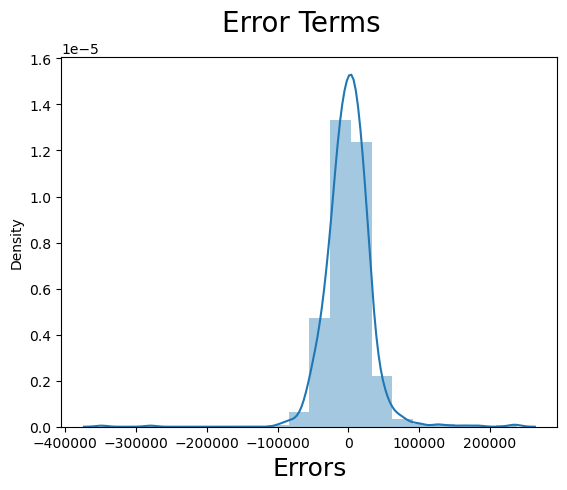

In [149]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [150]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

In [151]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1133954731712.2068
1110631470.8248842
33326.13795243733


In [152]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

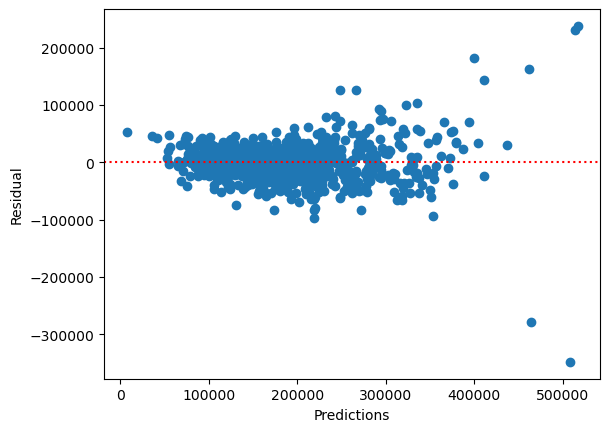

In [153]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [154]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [155]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [156]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [157]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stone'], dtype='object')

In [158]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [159]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [160]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          6.74e-161
Time:                        08:56:47   Log-Likelihood:                -5159.8
No. Observations:                 439   AIC:                         1.036e+04
Df Residuals:                     419   BIC:                         1.044e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.685e+05   3501.236     48.139      0.000    1.62e+05    1.75e+05
OverallQual           2.563e+04   2701.201      9.489      0.000    2.03e+04    3.09e+04
BsmtExposure          9144.7407   1821.951      5.019      0.000    5563.437    1.27e+04
1stFlrSF              2.677e+04   2484.639     10.773      0.000    2.19e+04    3.17e+04
2ndFlrSF              2.624e+04   2983.148      8.794      0.000    2.04e+04    3.21e+04
KitchenQual           1.096e+04   2115.123      5.180      0.000    6798.477    1.51e+04
MSSubClass_30        -6433.4335   7006.130     -0.918      0.359   -2.02e+04    7338.108
MSSubClass_120       -2.793e+04   7653.416     -3.649      0.000    -4.3e+04   -1.29e+04
MSSubClass_160       -2.807e+04   9913.846     -2.832      0.005   -4.76e+04   -8586.443
LotShape_IR2          4.487e+04   1.05e+04      4.278      0.000    2.43e+04    6.55e+04
LotConfig_FR3        -7.183e+04   3.26e+04     -2.206      0.028   -1.36e+05   -7823.563
Neighborhood_BrDale   1.847e+04   1.85e+04      1.001      0.317   -1.78e+04    5.47e+04
Neighborhood_Crawfor  2.068e+04   7673.246      2.695      0.007    5598.020    3.58e+04
Neighborhood_NPkVill  3.179e+04   1.96e+04      1.625      0.105   -6670.445    7.03e+04
Neighborhood_NoRidge  4.372e+04   1.34e+04      3.251      0.001    1.73e+04    7.02e+04
Neighborhood_NridgHt  7.913e+04   8829.502      8.962      0.000    6.18e+04    9.65e+04
Neighborhood_Somerst  1.427e+04   7080.056      2.016      0.044     357.304    2.82e+04
Neighborhood_StoneBr  8.432e+04   1.02e+04      8.277      0.000    6.43e+04    1.04e+05
HouseStyle_1Story     1.592e+04   6073.936      2.621      0.009    3977.845    2.79e+04
HouseStyle_2.5Fin    -8320.0521   1.63e+04     -0.510      0.610   -4.04e+04    2.38e+04
Exterior1st_BrkComm           0          0        nan        nan           0           0
Exterior1st_ImStucc           0          0        nan        nan           0           0
Exterior1st_Stone             0          0        nan        nan           0           0
==============================================================================
Omnibus:                       65.885   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.761
Skew:                           0.389   Prob(JB):                     1.31e-98
Kurtosis:                       7.903   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [161]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Calculate r2 score of Test model

In [162]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [163]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

498846988174.48615
1136325713.3815174
33709.43062974392


In [164]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [165]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.78
17,HouseStyle_1Story,2.27
3,2ndFlrSF,2.19
4,KitchenQual,1.97
2,1stFlrSF,1.94
7,MSSubClass_160,1.85
10,Neighborhood_BrDale,1.47
14,Neighborhood_NridgHt,1.44
15,Neighborhood_Somerst,1.43
6,MSSubClass_120,1.40


Text(0, 0.5, 'y_pred')

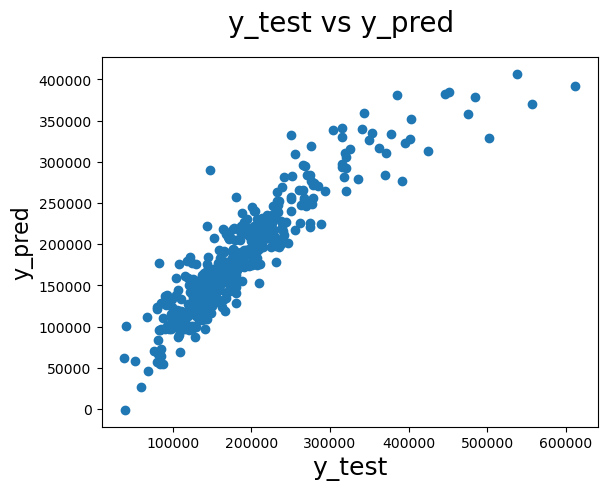

In [166]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [167]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stone'], dtype='object')

In [168]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


### Final evalution

* No of Variables = 21 i.e. OverallQual,BsmtUnfSF, TotalBsmtSF,1stFlrSF, 2ndFlrSF, MSSubClass_90, MSSubClass_160, MSZoning_RL, LotShape_IR3, LotConfig_CulDSac, Neighborhood_Crawfor , Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Veenker, Exterior1st_ImStucc, Exterior1st_Stucco, Exterior2nd_CmentBd , Exterior2nd_ImStucc, Exterior2nd_VinylSd
* VIF < 5
* p-value < 0.05
* r2 score for Train Data set model = 0.80
* r2 score for Test Data set model = 0.82

In [169]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8223158525831162
0.8234623102299554
1133954731712.2068
498846988174.48615
1110631470.8248842
1136325713.3815174


### Ridge Regression

In [170]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [171]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [172]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 26389.01666119  13269.76185564  21840.60026823  26480.90213435
  12923.85991684  -9129.34250358 -17240.6098551  -20163.72673461
   9287.71647141  -4273.25196564    282.98975845  17194.45455745
   5664.66018371  47185.49219962  38003.17362601  18661.85220411
  14500.72280682  23526.15477159  -1963.68155705  -4324.0739384
  -1385.21064294  -3958.06111581]


In [173]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8173168589175899
0.8143230724849101
1165857591946.12
524671962032.84485
1141878150.7797456
1195152533.1044302


### Lasso

In [174]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [175]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [176]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [177]:
lasso.coef_

array([ 25439.6304395 ,  13500.57312132,  20999.19999883,  26584.22885555,
        12334.35894685, -10359.14296249, -20095.25741607, -23706.53586052,
         8979.36672282,     -0.        ,      0.        ,  21440.46684945,
         1776.02753947,  61812.4458687 ,  47581.22362517,  23732.35177575,
        23277.94674207,  25030.82461038,     -0.        ,     -0.        ,
           -0.        ,     -0.        ])

In [178]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8200947047751566
0.8171744544867814
1148129778295.055
516614740225.86847
1124514964.0500047
1176798952.678516


In [179]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.223159e-01,8.173169e-01,8.200947e-01
1,R2 Score (Test),8.234623e-01,8.143231e-01,8.171745e-01
2,RSS (Train),1.133955e+12,1.165858e+12,1.148130e+12
3,RSS (Test),4.988470e+11,5.246720e+11,5.166147e+11
4,MSE (Train),3.332614e+04,3.379169e+04,3.353379e+04
5,MSE (Test),3.370943e+04,3.457098e+04,3.430450e+04


### Lets observe the changes in the coefficients after regularization

In [180]:
betas = pd.DataFrame(index=X.columns)

In [181]:
betas.rows = X.columns

In [182]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [183]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,24251.614815,26389.016661,25439.630439
BsmtExposure,13760.820154,13269.761856,13500.573121
1stFlrSF,20656.219484,21840.600268,20999.199999
2ndFlrSF,27076.958004,26480.902134,26584.228856
KitchenQual,12297.055705,12923.859917,12334.358947
MSSubClass_30,-14211.907522,-9129.342504,-10359.142962
MSSubClass_120,-25380.131815,-17240.609855,-20095.257416
MSSubClass_160,-33207.126249,-20163.726735,-23706.535861
LotShape_IR2,12064.649726,9287.716471,8979.366723
LotConfig_FR3,-18253.666864,-4273.251966,-0.000000


### 1: Double the values of Alpha for lasso & Ridge

In [184]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 27163.63102868  12912.10064904  22555.81732117  25690.1387995
  13375.0087149   -6680.85062857 -13600.26496863 -15659.40706744
   7554.79192545  -2352.47261315  -1709.12882058  12739.49304539
   2448.83600628  36980.23477525  30200.00837216  13881.17034936
   8267.86803405  20731.93620257  -1079.47229168  -2205.81629207
   -358.00109133  -2251.94022538]
0.8121251881012287
0.8094474002680541


In [185]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 26208.00609936  13264.03542994  21580.0606722   26218.50119892
  12513.6003069   -6621.04618152 -16051.87979241 -19735.40382278
   5823.41298469     -0.              0.          16807.292148
      0.          56829.41046675  42435.46351371  19526.22136343
  11072.56015231  23335.10642966     -0.             -0.
     -0.             -0.        ]
0.8177926761478999
0.8106452481291726


### 2: Drop the Top 5 features and rebuild lasso

In [186]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual', 'Neighborhood_Crawfor'], axis=1)

In [187]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Crawfor'], axis=1)

In [188]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [190]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [191]:
lasso.coef_

array([ 10023.63057413,  36540.7859744 ,  33713.51308922,  -1346.04071045,
           -0.        ,  -2982.39542277,   6987.01219065,     -0.        ,
           -0.        ,      0.        ,  15725.57304127,      0.        ,
       -33003.59073101,      0.        ,     -0.        ,      0.        ,
           -0.        ])

In [192]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6348824439905757
0.6728988532028981


In [193]:
X_train_new.columns

Index(['BsmtExposure', '1stFlrSF', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_NPkVill', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Stone'], dtype='object')